In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess


# CG vs Homicide (Monte-Carlo)

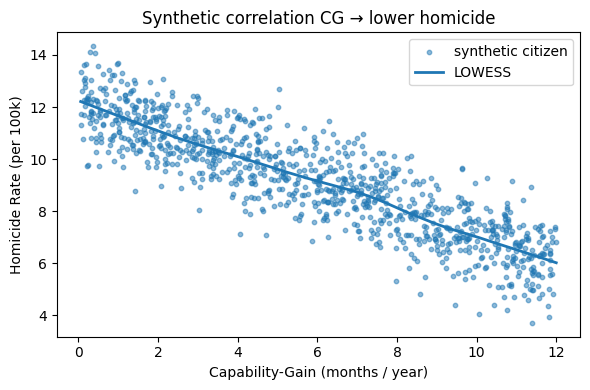

In [ ]:
# !pip install numpy pandas matplotlib statsmodels --quiet
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# -----------------------------
# Симуляция ➀: CG vs Homicide Rate
# -----------------------------
np.random.seed(42)
n = 1000                       # число «виртуальных граждан»
cg = np.random.uniform(0, 12, n)          # Capability-Gain, мес./год
noise = np.random.normal(0, 1, n)         # гауссов шум
hr = np.clip(12 - 0.5*cg + noise, 0, None)  # условная формула

# График
plt.figure(figsize=(6,4))
plt.scatter(cg, hr, s=10, alpha=.5, label='synthetic citizen')
smoothed = lowess(hr, cg, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], linewidth=2, label='LOWESS')
plt.xlabel('Capability-Gain (months / year)')
plt.ylabel('Homicide Rate (per 100k)')
plt.title('Synthetic correlation CG → lower homicide')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
pd.DataFrame({'CG': cg, 'HR': hr}).to_csv('cg_hr_data.csv', index=False)


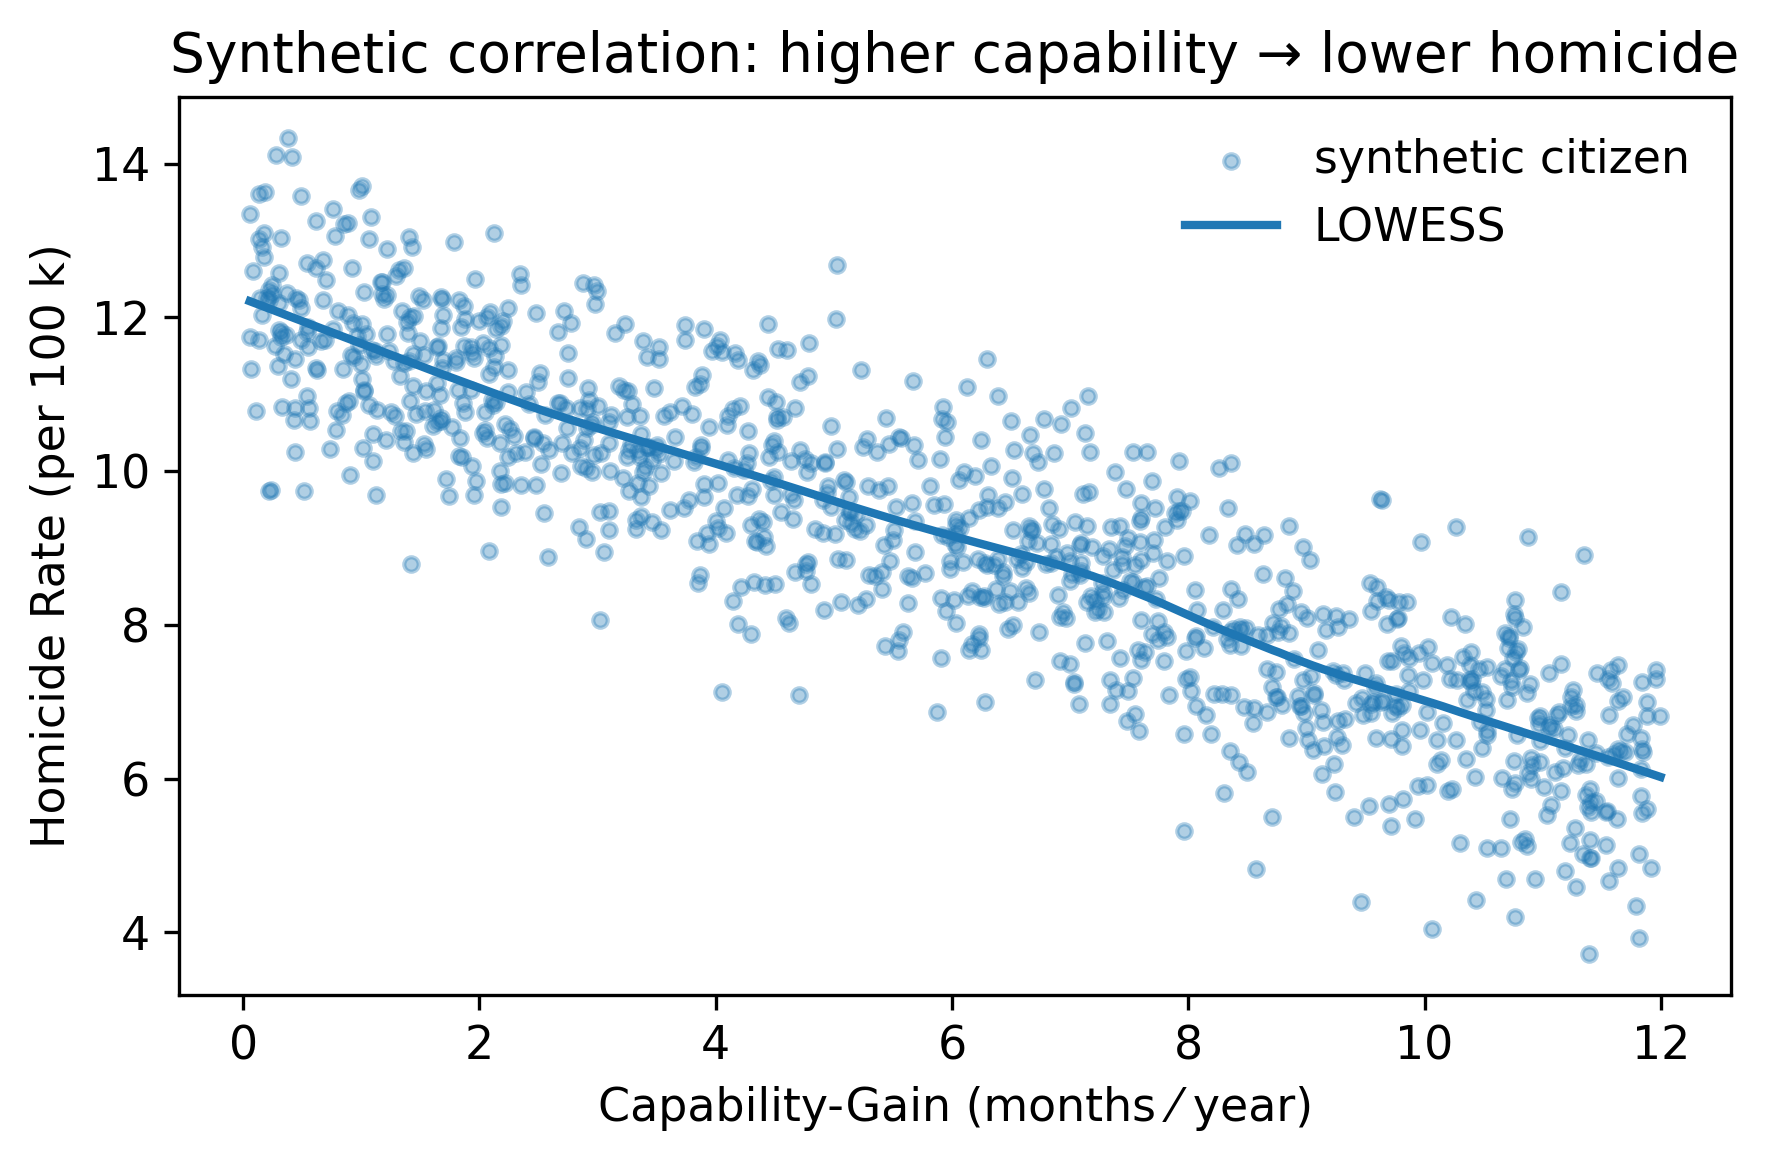

In [ ]:
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(6,4), dpi=300)
plt.scatter(cg, hr, s=12, alpha=.35, label='synthetic citizen')
low = lowess(hr, cg, frac=0.3)
plt.plot(low[:,0], low[:,1], linewidth=2, label='LOWESS')
plt.xlabel('Capability-Gain (months ⁄ year)')
plt.ylabel('Homicide Rate (per 100 k)')
plt.title('Synthetic correlation: higher capability → lower homicide')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('cg_hr_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
from google.colab import files
files.download('cg_hr_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Charter Scenario (3 countries)

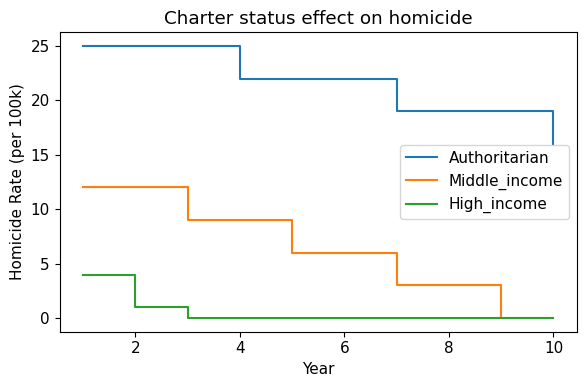

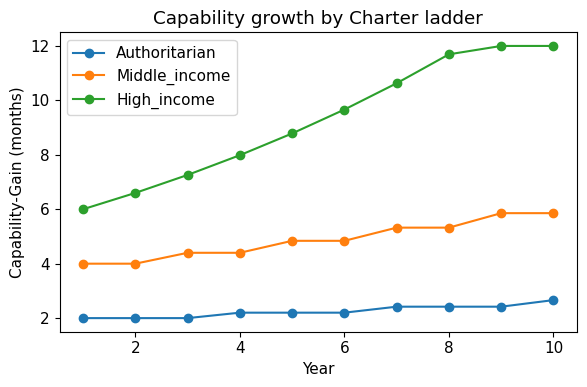

In [ ]:
# -----------------------------
# Симуляция ➁: Три страны и статусы Хартии
# -----------------------------
years = np.arange(1, 11)

countries = {
    'Authoritarian': {'HR':25, 'CG':2, 'step':3},
    'Middle_income': {'HR':12, 'CG':4, 'step':2},
    'High_income'  : {'HR':4,  'CG':6, 'step':1},
}

for y in years:
    for name, d in countries.items():
        d.setdefault('HR_series', []).append(d['HR'])
        d.setdefault('CG_series', []).append(d['CG'])
        # проверяем переход на новую ступень
        if y % d['step'] == 0:
            d['HR'] = max(0, d['HR'] - 3)
            d['CG'] = min(12, d['CG'] * 1.10)

# Ступенчатый график HR
plt.figure(figsize=(6,4))
for name, d in countries.items():
    plt.step(years, d['HR_series'], where='post', label=name)
plt.xlabel('Year')
plt.ylabel('Homicide Rate (per 100k)')
plt.title('Charter status effect on homicide')
plt.legend()
plt.tight_layout()
plt.show()

# Линии роста Capability-Gain
plt.figure(figsize=(6,4))
for name, d in countries.items():
    plt.plot(years, d['CG_series'], marker='o', label=name)
plt.xlabel('Year')
plt.ylabel('Capability-Gain (months)')
plt.title('Capability growth by Charter ladder')
plt.legend()
plt.tight_layout()
plt.show()


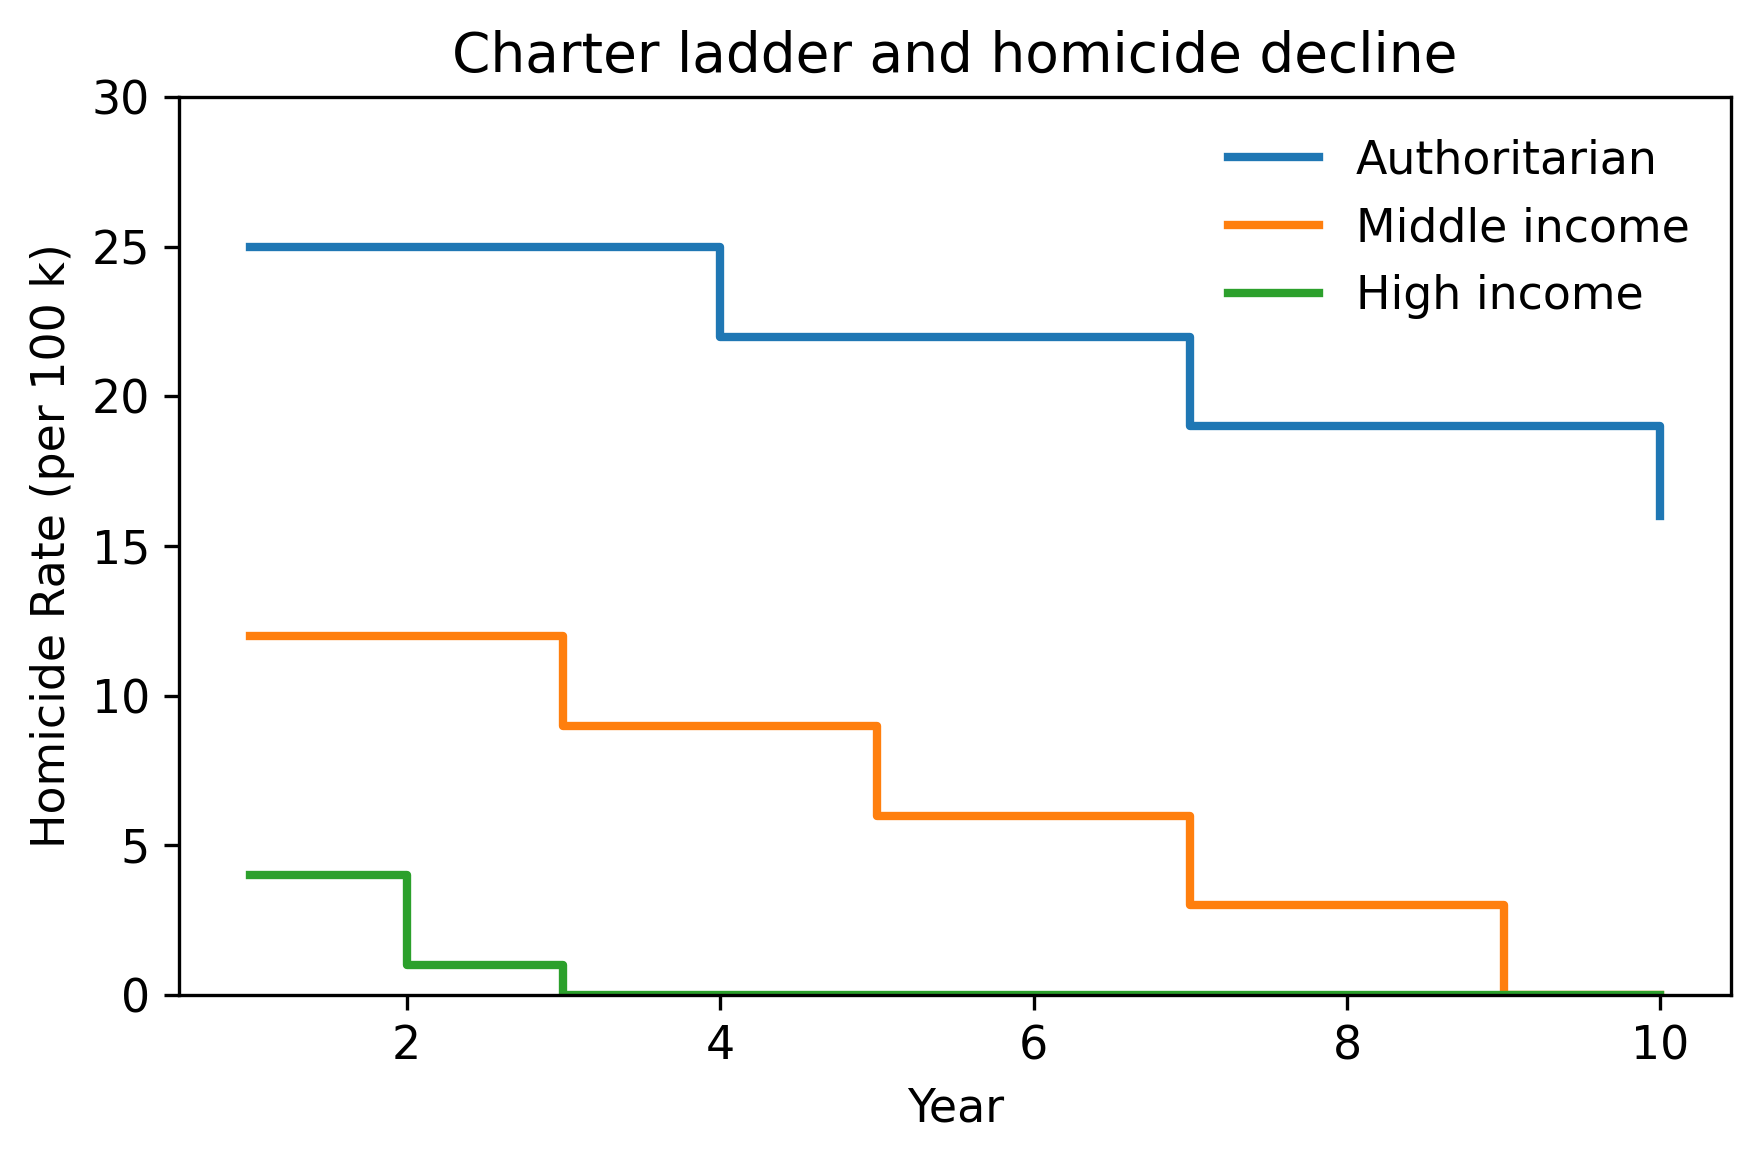

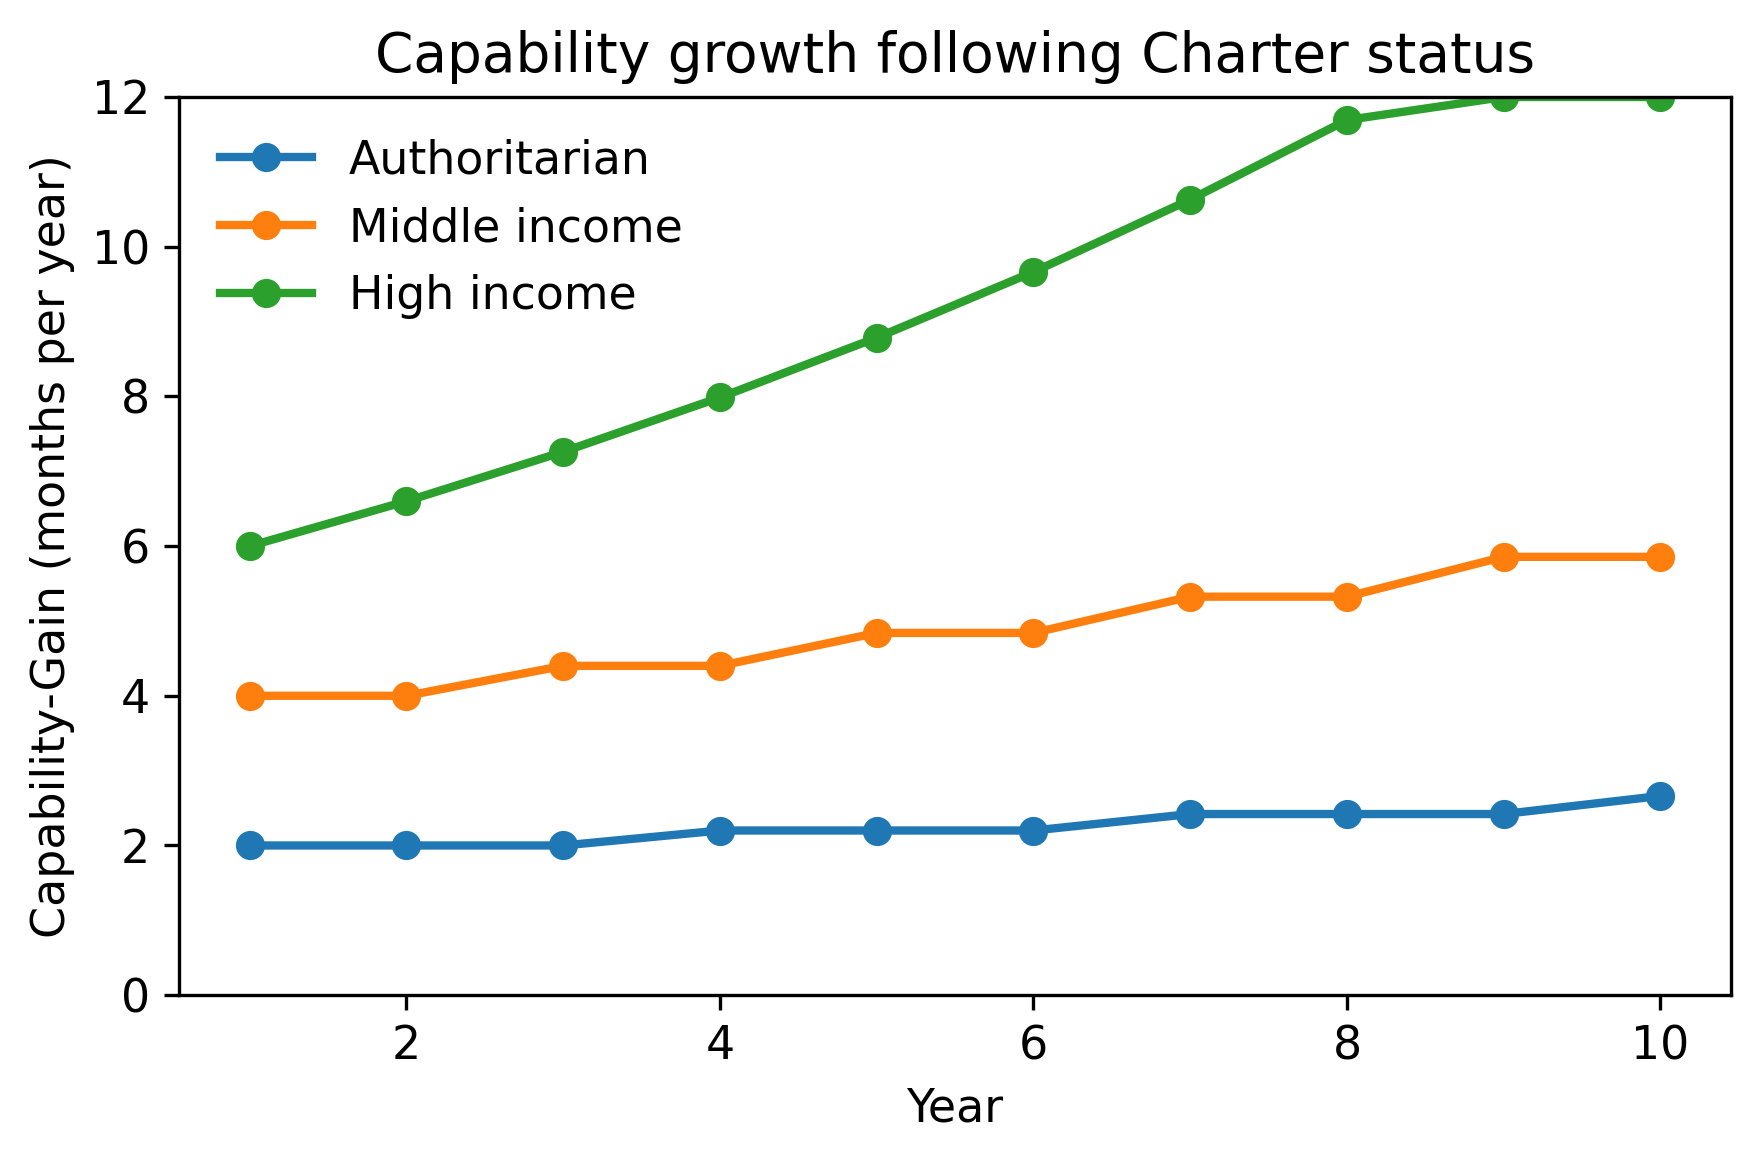

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = np.arange(1, 11)

# Опираемся на существующий словарь countries с HR_series и CG_series
plt.rcParams.update({'font.size': 11})

# --- HR ступеньками ---
plt.figure(figsize=(6,4), dpi=300)
for name, d in countries.items():
    plt.step(years, d['HR_series'], where='post', linewidth=2,
             label=name.replace('_', ' '))
plt.xlabel('Year')
plt.ylabel('Homicide Rate (per 100 k)')
plt.title('Charter ladder and homicide decline')
plt.ylim(0, max(d['HR_series'][0] for d in countries.values()) + 5)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('charter_hr_plot.png', dpi=300, bbox_inches='tight')

# --- Рост Capability-Gain ---
plt.figure(figsize=(6,4), dpi=300)
for name, d in countries.items():
    plt.plot(years, d['CG_series'], marker='o', linewidth=2,
             label=name.replace('_', ' '))
plt.xlabel('Year')
plt.ylabel('Capability-Gain (months per year)')
plt.title('Capability growth following Charter status')
plt.ylim(0, 12)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('charter_cg_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
years = np.arange(1, 11)

def scenario(hr0, decay, cg_growth):
    hr = [hr0 - decay*(y-1) for y in years]          # простой линейный спад
    cg = [cg_growth*y for y in years]                # линейный рост CG
    return hr, cg

hr_auth,  cg_auth  = scenario(15, 1.0, 0.4)   # авторитарная
hr_mid,   cg_mid   = scenario(10, 0.7, 0.6)   # средний доход
hr_high,  cg_high  = scenario( 5, 0.5, 0.8)   # высокий доход


In [ ]:
countries = {
    'Authoritarian_low': {'HR_series': hr_auth,  'CG_series': cg_auth},
    'Mid_income':        {'HR_series': hr_mid,   'CG_series': cg_mid},
    'High_income':       {'HR_series': hr_high,  'CG_series': cg_high}
}

import pandas as pd, numpy as np
rows = []
for name, d in countries.items():
    for y, hr, cg in zip(range(1,11), d['HR_series'], d['CG_series']):
        rows.append({'Country': name, 'Year': y, 'HR': hr, 'CG': cg})

df = pd.DataFrame(rows)
df.to_csv('charter_countries.csv', index=False)
print('Сохранено charter_countries.csv')


Сохранено charter_countries.csv


In [ ]:
from google.colab import files
files.download('charter_countries.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>